# Presentación Final
## Se eligió una database con los datos de las canciones de los álbumes más importantes de Taylor Swift

In [2]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

     |████████████████████████████████| 25.3 MB 4.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       sample_pivot.csv
Book3.csv                  headbrain.csv  spotify_taylorswift.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [6]:
df = pd.read_csv('datasets/spotify_taylorswift.csv')
type(df)

pandas.core.frame.DataFrame

In [7]:
df

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.000000,0.1190,-6.941,0.0231,0.289,99.953
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.000000,0.1230,-5.769,0.0266,0.261,175.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,166,Mr. Perfectly Fine (Taylor’s Version) (From Th...,Fearless (Taylor's Version),Taylor Swift,2021-04-09,277591,74,0.660,0.162,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942
167,167,We Were Happy (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),Taylor Swift,2021-04-09,244236,65,0.609,0.849,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007
168,168,That’s When (feat. Keith Urban) (Taylor’s Vers...,Fearless (Taylor's Version),Taylor Swift,2021-04-09,189495,67,0.588,0.225,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201
169,169,Don’t You (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),Taylor Swift,2021-04-09,208608,66,0.563,0.514,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934


In [8]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 16 entries, Unnamed: 0 to tempo
dtypes: float64(9), int64(3), object(4)
memory usage: 21.5+ KB


In [9]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'artist', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo'],
      dtype='object')

In [10]:
df.index

RangeIndex(start=0, stop=171, step=1)

# Descripción de las variables que tiene la base de datos sin haber hecho limpieza

* unnamed - id de la canción, variable numérica
* name - nombre de la canción, variable object
* album - nombre del album, variable object
* artist - nombre del artista o artistas involucrados, variable object
* release_date - fecha en la que salió el album, variable object
* lenght - largo de la canción en milisegundos, variable numérica
* popularity - porcentaje de popularidad de la canción basada en el algoritmo de Spotify, variable numérica
* danceability - qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general, variable float
* acousticness - qué tan acústica es la canción, variable float
* energy - una medida perceptiva de intensidad y actividad, variable float
* instrumentalness - la cantidad de voces en la canción (coros), variable float
* liveness - probabilidad de que la canción haya sido grabada con una audiencia en vivo, variable float
* loudness - tendencia de la música a grabarse a volúmenes cada vez más altos, variable float
* speechiness - presencia de palabras habladas en una pista, variable float
* valence - medida de qué tan feliz es la canción, variable float
* tempo - beats por minuto, variable float

## para este estudio se decidió eliminar las variables "release_date", "speechiness", "liveness", "loudness", "unnnamed", "instrumentalness"
## dejando ahora 10 variables de interés

In [11]:
df.drop(['release_date','speechiness','liveness','loudness','Unnamed: 0','instrumentalness'], axis=1, inplace=True)
df.head()

,name,album,artist,length,popularity,danceability,acousticness,energy,valence,tempo
0,Tim McGraw,Taylor Swift,Taylor Swift,232106,49,0.580,0.575,0.491,0.425,76.009
1,Picture To Burn,Taylor Swift,Taylor Swift,173066,54,0.658,0.173,0.877,0.821,105.586
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,203040,59,0.621,0.288,0.417,0.289,99.953
3,A Place in this World,Taylor Swift,Taylor Swift,199200,49,0.576,0.051,0.777,0.428,115.028
4,Cold As You,Taylor Swift,Taylor Swift,239013,50,0.418,0.217,0.482,0.261,175.558


# Pregunta de investigación 1
## ¿Cuál es el álbum con mayor porcentaje de popularidad?

In [12]:
my_pivot = pd.pivot_table(df,
                          index = 'album',
                          values = 'popularity',
                          aggfunc = 'mean',
                          margins = True
                         )
my_pivot

,popularity
album,
1989 (Deluxe),54.421053
Fearless (Taylor's Version),65.576923
Lover,72.111111
Red (Deluxe Edition),60.500000
Speak Now (Deluxe Package),49.727273
Taylor Swift,50.133333
evermore (deluxe version),65.470588
folklore (deluxe version),62.647059
reputation,71.866667


## Conclusión: el álbum con mayor porcentaje de popularidad es "Lover"

# Pregunta de investigación 2:
## ¿La "baileabilidad" de una canción depende del tempo en el que esta esté?

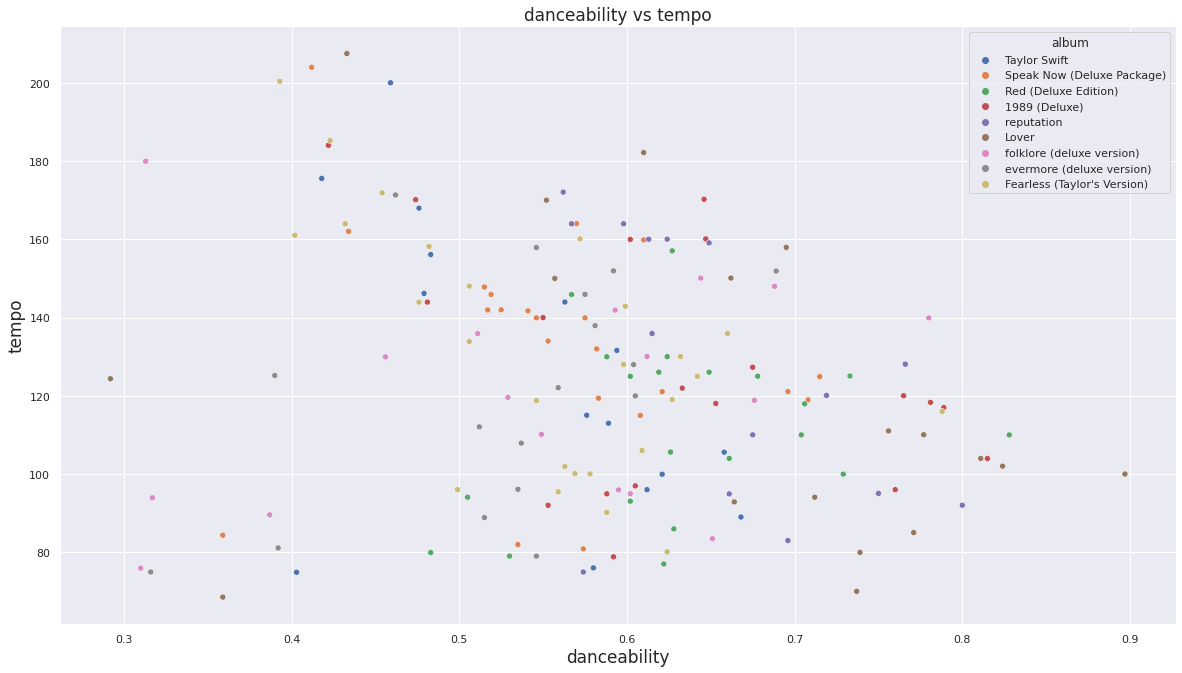

In [14]:
sns.scatterplot(x='danceability', y='tempo', data=df, hue='album')
sns.set(rc={'figure.figsize':(20,11)})
plt.xlabel('danceability',fontsize=17)
plt.ylabel('tempo',fontsize=17)
plt.title('danceability vs tempo',fontsize=17)
plt.show()

## Conclusión: no existe una relación directa entre qué tan bailable se considera una canción y el tempo de la misma, ya que, como podemos observar, hay canciones que son muy bailables con tempo bajo y canciones que no son bailables con tempo muy alto. También podemos observar que ni el tempo ni la danceability dependen del album, ya que cada album contiene canciones de diferente tipo y tempo.

# Pregunta de investigación 3:
## ¿Qué porcentaje de popularidad tiene el mayor grupo de canciones?

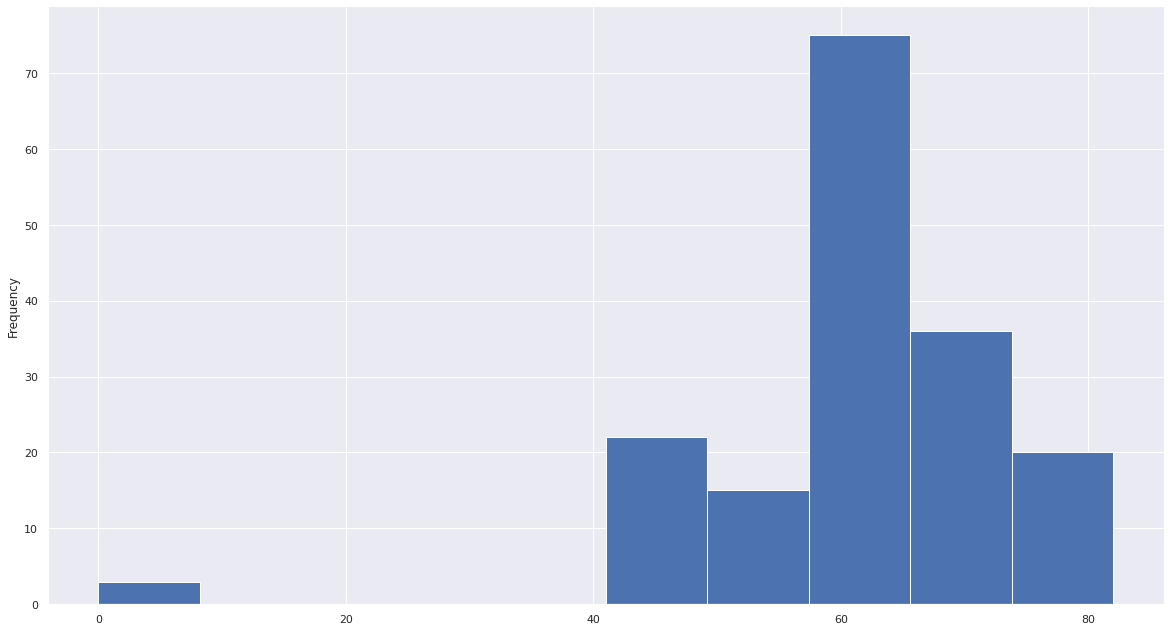

In [15]:
hist_ts = df['popularity'].plot(kind='hist')

## Conclusión: la mayoría de las canciones de Taylor Swift tienen un porcentaje de popularidad aproximado de 60

# Pregunta de investigación 4:
## ¿La mayoría de las canciones de Taylor Swift son felices, bailables y energéticas?

Text(0.5, 1.0, '¿Qué tan bailables, felices y energéticas son las canciones de Taylor Swift?')

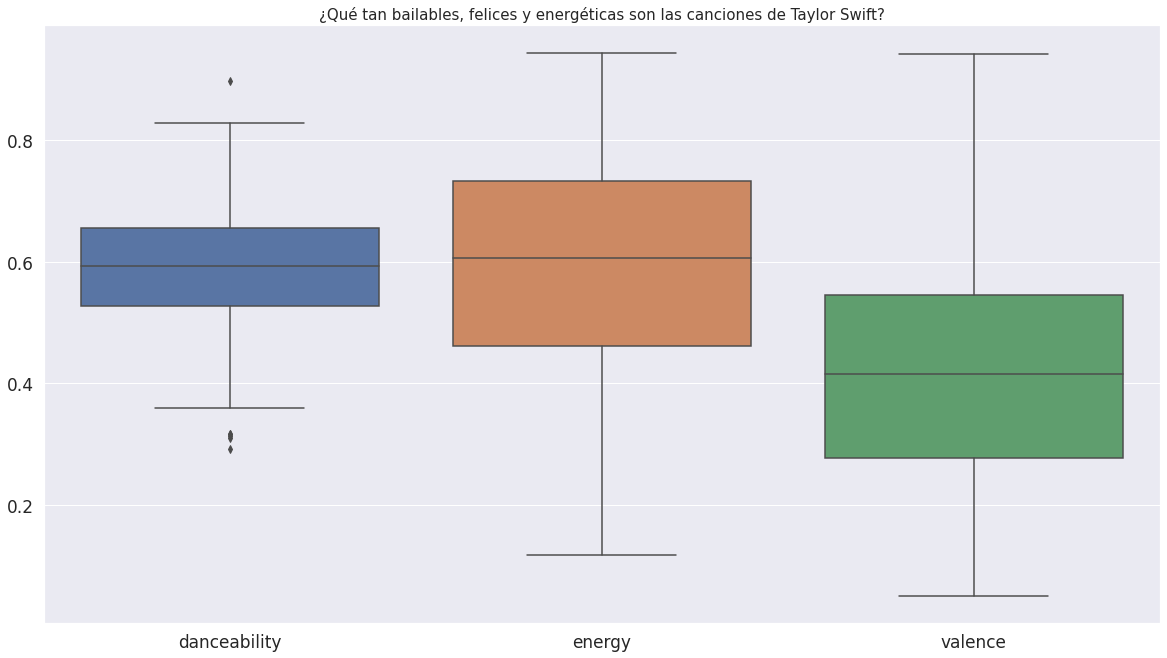

In [16]:
sns.boxplot(data = df.loc[:,['danceability','energy','valence']])
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.title('¿Qué tan bailables, felices y energéticas son las canciones de Taylor Swift?', fontsize=15)

## Conclusión: al observar estas 3 variables que determinan que tan movidas son las canciones, podemos ver que las canciones de Taylor Swift no se caracterizan precisamente por ser de ese tipo, ya que en general dichas canciones se posicionan en promedio con un 50% de las variables que estamos estudiando, algo que nos muestra que sus canciones son más que nada calmadas y hasta algo tristes

# Pregunta de investigación 5:
## ¿Cuál album tiene menos canciones y cuál tiene más?

In [21]:
counts = df['album'].value_counts()
counts = counts.to_frame()
counts

counts['%'] = (counts.iloc[:,:]/counts.loc[:,'album'].sum(axis=0))*100
counts.reset_index(inplace=True)
counts = counts.rename({'index':'album','album':'# de canciones'}, axis=1)
counts

,album,# de canciones,%
0,Fearless (Taylor's Version),26,15.204678
1,Red (Deluxe Edition),22,12.865497
2,Speak Now (Deluxe Package),22,12.865497
3,1989 (Deluxe),19,11.111111
4,Lover,18,10.526316
5,folklore (deluxe version),17,9.941520
6,evermore (deluxe version),17,9.941520
7,Taylor Swift,15,8.771930
8,reputation,15,8.771930


Text(0.5, 1.0, 'número de canciones por album')

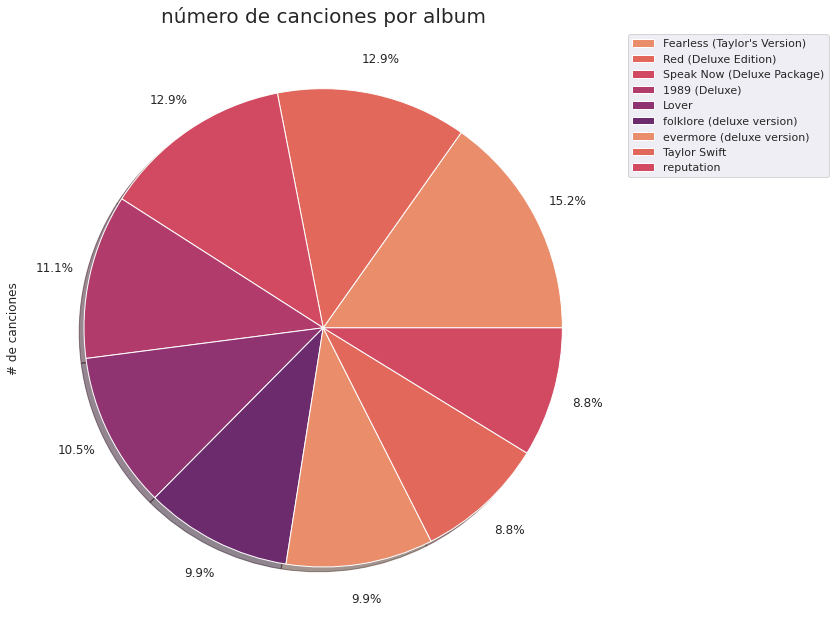

In [36]:
colores = sns.color_palette("flare")
counts['# de canciones'].plot(kind='pie',
                              shadow=True,
                              autopct='%1.1f%%',
                              pctdistance=1.15,
                              colors = colores,
                             labels=None)
plt.legend(labels=counts.album,
          bbox_to_anchor=(1,1))
plt.title('número de canciones por album', fontsize=20)

## Conclusión: El album que tiene más canciones es el de "Fearless (Taylor's Version)" con 26 canciones (15.2% del total de canciones de Taylor Swift) y los álbumes con menos canciones son "Taylor Swift" y "reputation" con 15 canciones (8.8% del total de canciones de Taylor Swift)